In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

import os
import shutil
import pandas as pd
from pathlib import Path
import numpy as np
import sys
import matplotlib.pyplot as plt
import pickle
from tqdm import tqdm

sys.path.append(str(Path(os.getcwd()).parent))
from data_utilities import (
    find_outliers, convert_age_from_days_to_years, draw_age_distribution, calculate_code_age_distribution)

### Total no. of artifacts in dataset

In [2]:
DATASET_NAME = 'dataset-depthmap-Train-2021-09-09-15-43-24'
DATASET_PATH = Path(f'/mnt/datasets/{DATASET_NAME}')

In [3]:
SAMPLE_PICKLE_PATH = 'scans/00057800-0d3c-11ec-985b-fb911c877578/100/pc_00088540-0d3c-11ec-985b-73c081c1c387_2021-09-04-04-53-02-327719_100_1.0.p'
!ls /mnt/datasets/{DATASET_NAME}/{SAMPLE_PICKLE_PATH}
# ab575ae5-eecc-11eb-af66-e3654568dc70/100/pc_ab575ae5-eecc-11eb-af66-e3654568dc70_2021-07-27 11:20:31.569847_100_8.p

/mnt/datasets/dataset-depthmap-Train-2021-09-09-15-43-24/scans/00057800-0d3c-11ec-985b-fb911c877578/100/pc_00088540-0d3c-11ec-985b-73c081c1c387_2021-09-04-04-53-02-327719_100_1.0.p


In [4]:
!du /mnt/datasets/{DATASET_NAME} -sh --apparent-size

43G	/mnt/datasets/dataset-depthmap-Train-2021-09-09-15-43-24


In [ ]:
# Check resolution of depthmap
for fpath_pickle in tqdm(DATASET_PATH.glob('**/*.p')):
    depthmap, targets = pickle.load(open(fpath_pickle, "rb"))
    assert depthmap.shape == (240, 180, 1), fpath_pickle

260862it [3:27:59, 12.16it/s]

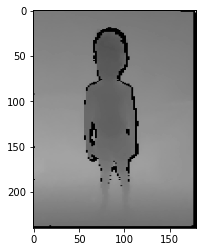

In [296]:
paths  = DATASET_PATH / SAMPLE_PICKLE_PATH
depthmap, targets = pickle.load(open(paths, "rb"))
_ = plt.imshow(np.squeeze(depthmap), cmap='gray')
plt.show()

In [274]:
print("targets: ", targets)
print("depthmap.shape: ", depthmap.shape)

targets:  {'file_path': '1630731182321/83af85b1-f327-4af0-a0b2-d9589f3dbffc', 'timestamp': '2021-09-04-04-53-02-327719', 'scan_id': '00088540-0d3c-11ec-985b-73c081c1c387', 'scan_step': 100, 'scan_version': 'v0.8', 'height': 82.0, 'weight': 9.15, 'muac': 12.8, 'order_number': 1.0, 'format': 'depth', 'device_model': 'HUAWEI VOG-L29', 'person_id': '00057800-0d3c-11ec-985b-fb911c877578', 'age': 448, 'sex': 'male', 'device_pose': [-0.3072169733432915, -0.9502416240082697, -0.051561490396552064, 0.0, -0.08773645984649003, -0.025668703194535573, 0.9958129499509012, 0.0, -0.9475864313630672, 0.31045446313177283, -0.07548497478419257, 0.0, 0.007619209, -0.016058141, -0.009007642, 1.0], 'raw_header': '240x180_0.001_7_-0.44551563_0.58245885_0.5606694_-0.38458723_-0.007619209_0.016058141_0.009007642', 'angle': -18.086620675533624}
depthmap.shape:  (240, 180, 1)


In [297]:
!head /mnt/datasets/{DATASET_NAME}/labels.csv

file_path,timestamp,scan_id,scan_step,scan_version,height,weight,muac,order_number,format,device_model,person_id,age,sex,Years
1630061040088/f493c35b-6227-4efa-8cf3-3c7ab88eb549,2021-08-27-10-44-00-100435,42f96360-0724-11ec-abef-d7697322d860,102,v0.9,96.6,12.5,14.7,1.0,depth,HUAWEI VOG-L29,424b7020-0724-11ec-abef-f7d2656ba536,1530,female,4
1630061040204/a844ae82-3140-46a8-bba6-f8316d500360,2021-08-27-10-44-00-209814,42f96360-0724-11ec-abef-d7697322d860,102,v0.9,96.6,12.5,14.7,2.0,depth,HUAWEI VOG-L29,424b7020-0724-11ec-abef-f7d2656ba536,1530,female,4
1630061040339/ff251cfe-ddcb-48e4-8070-47dfbdb964dc,2021-08-27-10-44-00-350436,42f96360-0724-11ec-abef-d7697322d860,102,v0.9,96.6,12.5,14.7,3.0,depth,HUAWEI VOG-L29,424b7020-0724-11ec-abef-f7d2656ba536,1530,female,4
1630061040458/31e74f27-d026-47b9-924a-c300e69dbd6d,2021-08-27-10-44-00-459772,42f96360-0724-11ec-abef-d7697322d860,102,v0.9,96.6,12.5,14.7,4.0,depth,HUAWEI VOG-L29,424b7020-0724-11ec-abef-f7d2656ba536,1530,female,4
1630061040614

In [298]:
artifacts = pd.read_csv(DATASET_PATH / 'labels.csv')
print("Total no. of artifacts:", len(artifacts))
artifacts.head()

Total no. of artifacts: 261115


,file_path,timestamp,scan_id,scan_step,scan_version,height,weight,muac,order_number,format,device_model,person_id,age,sex,Years
0,1630061040088/f493c35b-6227-4efa-8cf3-3c7ab88e...,2021-08-27-10-44-00-100435,42f96360-0724-11ec-abef-d7697322d860,102,v0.9,96.6,12.5,14.7,1.0,depth,HUAWEI VOG-L29,424b7020-0724-11ec-abef-f7d2656ba536,1530,female,4
1,1630061040204/a844ae82-3140-46a8-bba6-f8316d50...,2021-08-27-10-44-00-209814,42f96360-0724-11ec-abef-d7697322d860,102,v0.9,96.6,12.5,14.7,2.0,depth,HUAWEI VOG-L29,424b7020-0724-11ec-abef-f7d2656ba536,1530,female,4
2,1630061040339/ff251cfe-ddcb-48e4-8070-47dfbdb9...,2021-08-27-10-44-00-350436,42f96360-0724-11ec-abef-d7697322d860,102,v0.9,96.6,12.5,14.7,3.0,depth,HUAWEI VOG-L29,424b7020-0724-11ec-abef-f7d2656ba536,1530,female,4
3,1630061040458/31e74f27-d026-47b9-924a-c300e69d...,2021-08-27-10-44-00-459772,42f96360-0724-11ec-abef-d7697322d860,102,v0.9,96.6,12.5,14.7,4.0,depth,HUAWEI VOG-L29,424b7020-0724-11ec-abef-f7d2656ba536,1530,female,4
4,1630061040614/f7e0d697-edda-43f2-be64-62ea8e1b...,2021-08-27-10-44-00-616014,42f96360-0724-11ec-abef-d7697322d860,102,v0.9,96.6,12.5,14.7,5.0,depth,HUAWEI VOG-L29,424b7020-0724-11ec-abef-f7d2656ba536,1530,female,4


In [299]:
#adding the Years column into dataframe
artifacts['Years'] = artifacts.apply(convert_age_from_days_to_years, axis=1)
artifacts.head()

,file_path,timestamp,scan_id,scan_step,scan_version,height,weight,muac,order_number,format,device_model,person_id,age,sex,Years
0,1630061040088/f493c35b-6227-4efa-8cf3-3c7ab88e...,2021-08-27-10-44-00-100435,42f96360-0724-11ec-abef-d7697322d860,102,v0.9,96.6,12.5,14.7,1.0,depth,HUAWEI VOG-L29,424b7020-0724-11ec-abef-f7d2656ba536,1530,female,4
1,1630061040204/a844ae82-3140-46a8-bba6-f8316d50...,2021-08-27-10-44-00-209814,42f96360-0724-11ec-abef-d7697322d860,102,v0.9,96.6,12.5,14.7,2.0,depth,HUAWEI VOG-L29,424b7020-0724-11ec-abef-f7d2656ba536,1530,female,4
2,1630061040339/ff251cfe-ddcb-48e4-8070-47dfbdb9...,2021-08-27-10-44-00-350436,42f96360-0724-11ec-abef-d7697322d860,102,v0.9,96.6,12.5,14.7,3.0,depth,HUAWEI VOG-L29,424b7020-0724-11ec-abef-f7d2656ba536,1530,female,4
3,1630061040458/31e74f27-d026-47b9-924a-c300e69d...,2021-08-27-10-44-00-459772,42f96360-0724-11ec-abef-d7697322d860,102,v0.9,96.6,12.5,14.7,4.0,depth,HUAWEI VOG-L29,424b7020-0724-11ec-abef-f7d2656ba536,1530,female,4
4,1630061040614/f7e0d697-edda-43f2-be64-62ea8e1b...,2021-08-27-10-44-00-616014,42f96360-0724-11ec-abef-d7697322d860,102,v0.9,96.6,12.5,14.7,5.0,depth,HUAWEI VOG-L29,424b7020-0724-11ec-abef-f7d2656ba536,1530,female,4


### Total no. of children in the dataset

In [300]:
print("Total no. of artifacts:", len(artifacts))
unique_scan_ids = artifacts.drop_duplicates(subset='scan_id', keep='first')
print("Total no. of unique scan ids:", len(unique_scan_ids))
unique_person_ids = artifacts.drop_duplicates(subset='person_id', keep='first')
print("Total no. of unique person ids:", len(unique_person_ids))

Total no. of artifacts: 261115
Total no. of unique scan ids: 17656
Total no. of unique person ids: 5729


HUAWEI VOG-L29    261115
Name: device_model, dtype: int64


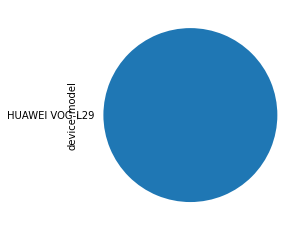

In [301]:
print(artifacts['device_model'].value_counts())
_ = artifacts['device_model'].value_counts().plot(kind='pie')

v0.8      240013
v0.9       20256
v1.0.2       846
Name: scan_version, dtype: int64


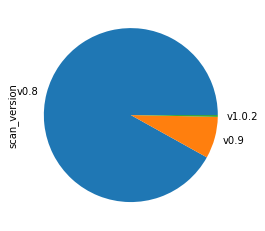

In [302]:
print(artifacts['scan_version'].value_counts())
_ = artifacts['scan_version'].value_counts().plot(kind='pie')

0     573
1    1237
2    1191
3    1280
4    1443
5       5
Name: Years, dtype: int64


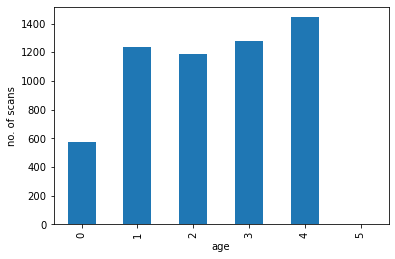

In [303]:
draw_age_distribution(unique_person_ids)

0    1730
1    3723
2    3641
3    3936
4    4611
5      15
Name: Years, dtype: int64


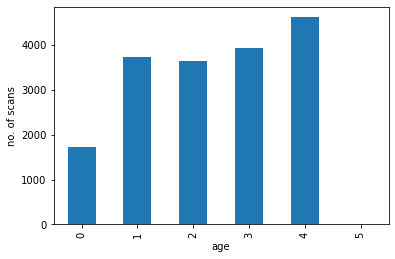

In [304]:
draw_age_distribution(unique_scan_ids)

101    115143
102     39911
100     39677
201     39231
200     13582
202     13571
Name: scan_step, dtype: int64


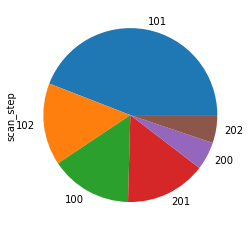

In [305]:
## keys for different scan type and their distribution in dataset
"- 100 - standing front scan",
"- 101 - standing 360 scan",
"- 102 - standing back scan",
"- 200 - lying front scan",
"- 201 - lying side scan",
"- 202 - lying back scan"
print(artifacts['scan_step'].value_counts())
_ = artifacts['scan_step'].value_counts().plot(kind='pie')

In [306]:
scan_type_colname = 'scan_step' # for other datasets this can be "key"
calculate_code_age_distribution(artifacts, scan_type_colname)

2021-09-22 07:32:42,242 - INFO - scan_step - /mnt/batch/tasks/shared/LS_root/mounts/clusters/pksingh/code/Users/pksingh/cgm-ml/cgmml/data_utils/dataset_EDA/data_utilities.py: line 52


,0,1,2,3,4
codes,,,,,
102,243,3275,10490,11872,13986
101,728,9360,30530,34185,40210
100,246,3193,10443,11861,13889
200,4942,8066,511,27,36
201,14427,23140,1482,78,104
202,4950,8045,513,27,36


In [307]:
calculate_code_age_distribution(unique_scan_ids, scan_type_colname)

2021-09-22 07:32:44,616 - INFO - scan_step - /mnt/batch/tasks/shared/LS_root/mounts/clusters/pksingh/code/Users/pksingh/cgm-ml/cgmml/data_utils/dataset_EDA/data_utilities.py: line 52


,0,1,2,3,4
codes,,,,,
102,27,356,1158,1310,1534
101,28,350,1153,1306,1529
100,28,356,1159,1311,1536
200,550,889,57,3,4
201,548,884,57,3,4
202,549,888,57,3,4


### Distribution of height, weight and age against each other

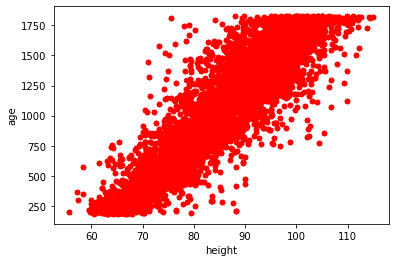

In [308]:
#distribution of height against age
height_vs_age = unique_scan_ids.plot.scatter(x='height', y='age', c='red')

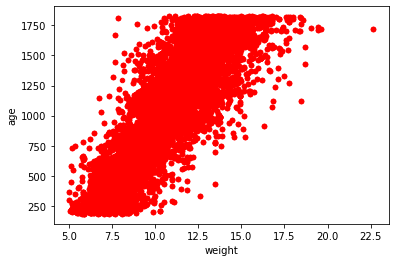

In [309]:
#distribution of weight against age
weight_vs_age = unique_scan_ids.plot.scatter(x='weight', y='age', c='red')

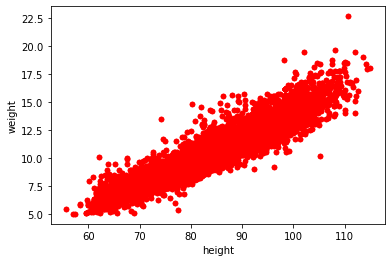

In [310]:
## distribution of height against weight
weight_vs_height = unique_scan_ids.plot.scatter(x='height', y='weight', c='red')

## Analyze outliers: 1) age, 2) weight, 3) height, 4) pixel values

In [311]:
artifacts.describe()

,scan_step,height,weight,muac,order_number,age,Years
count,261115.000000,261115.000000,261115.000000,261115.000000,261115.000000,261115.000000,261115.000000
mean,126.424135,85.283534,10.810285,13.890742,10.284135,1046.536201,2.341156
std,43.547090,11.509881,2.615953,1.042882,7.957550,484.902529,1.327149
min,100.000000,55.600000,5.000000,9.900000,1.000000,184.000000,0.000000
25%,101.000000,76.200000,8.700000,13.200000,4.000000,619.000000,1.000000
50%,101.000000,86.000000,10.800000,13.800000,8.000000,1070.000000,2.000000
75%,200.000000,94.400000,12.750000,14.500000,16.000000,1481.000000,4.000000
max,202.000000,115.000000,22.650000,18.500000,104.000000,1825.000000,5.000000


In [312]:
unique_scan_ids.describe()

,scan_step,height,weight,muac,order_number,age,Years
count,17656.000000,17656.000000,17656.000000,17656.000000,17656.000000,17656.000000,17656.000000
mean,126.486690,85.275176,10.814150,13.893101,1.025714,1046.472587,2.340961
std,43.587727,11.517429,2.617713,1.042518,0.452460,485.012859,1.327346
min,100.000000,55.600000,5.000000,9.900000,1.000000,184.000000,0.000000
25%,101.000000,76.200000,8.700000,13.200000,1.000000,618.000000,1.000000
50%,102.000000,86.000000,10.800000,13.800000,1.000000,1070.000000,2.000000
75%,200.000000,94.400000,12.750000,14.500000,1.000000,1481.000000,4.000000
max,202.000000,115.000000,22.650000,18.500000,22.000000,1825.000000,5.000000


### 1) Check age

##### Check age < 6 months or  > 6 years

In [313]:
find_outliers(artifacts, 'age', '<365/2', data_id_name='person_id')

Running the following query: @df.age<365/2
No. of outliers: 0


[]

In [314]:
find_outliers(artifacts, 'age', '<365/2', data_id_name='scan_id')

Running the following query: @df.age<365/2
No. of outliers: 0


[]

In [315]:
find_outliers(artifacts, 'age', '>365*6', data_id_name='scan_id')

Running the following query: @df.age>365*6
No. of outliers: 0


[]

### 2) Check weight

In [316]:
find_outliers(artifacts, 'weight', '<5.0', data_id_name='scan_id')

Running the following query: @df.weight<5.0
No. of outliers: 0


[]

In [317]:
find_outliers(artifacts, 'weight', '>30.0', data_id_name='scan_id')

Running the following query: @df.weight>30.0
No. of outliers: 0


[]

### 3) Check height

In [318]:
find_outliers(artifacts, 'height', '<40.0', data_id_name='scan_id')

Running the following query: @df.height<40.0
No. of outliers: 0


[]

In [319]:
find_outliers(artifacts, 'height', '>150.0', data_id_name='scan_id')

Running the following query: @df.height>150.0
No. of outliers: 0


[]